# CS-UY 3943 - Introduction of Data Science
## Final Project: Tweet Sentiment Extraction

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Taylor Wong
NetID:  tw1835
Group Member 1:  Thomas Scarola
NetID:  tws285
***

# Preliminary Data Analysis

#### Include 1 or 2 plots or data tables that demonstrate initial EDA efforts


1\. Read the data file `train.csv` into your program as a `pandas` `DataFrame`

In [30]:
#Place your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('train.csv')

# dropping ticket, cabin, name -- missing a lot of data, dont contribute much
# cabin -- captured in pclass and fare
# ticket -- each unique 
# name -- each unique
df = df.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df.head(10).sort_values('Survived')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


<hr />

2a. Graphical EDA: Categorical Features -- Display the different percentages of each feature in the total data (What percentage of each feature survived? What percentage did not?)

Pclass, Sex, SibSp, Parch, Embarked (Note: including SibSp, Parch since they have a small range)


Text(0.5, 1.01, 'Percentage of Surivors by Embarking Destination')

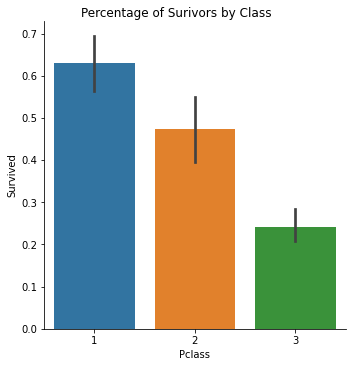

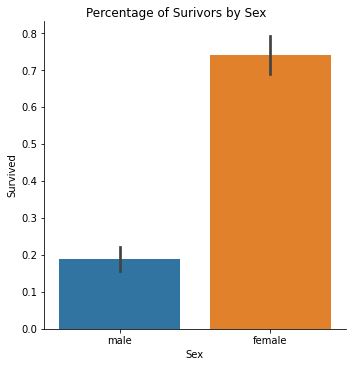

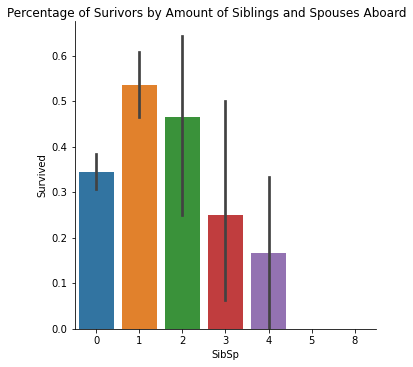

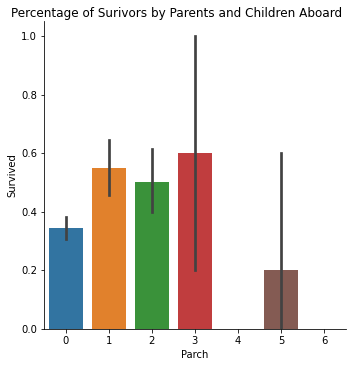

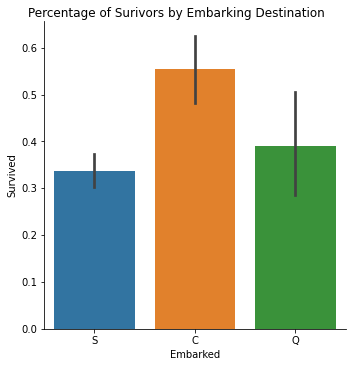

In [32]:
# categorical data EDA (Pclass, Sex, SibSp, Parch, Embarked)

# plot the percentage of people that survived based on class
class_plot = sns.catplot(data=df, x='Pclass', y='Survived', kind='bar', margin_titles=True)
class_plot.fig.suptitle('Percentage of Surivors by Class', y=1.01)

# plot the percentage of people that survived based on gender
sex_plot = sns.catplot(data=df, x='Sex', y='Survived', kind='bar', margin_titles=True)
sex_plot.fig.suptitle('Percentage of Surivors by Sex', y=1.01)

# plot the percentage of people that survived based on the number of siblings or spouses they had
sibsp_plot = sns.catplot(data=df, x='SibSp', y='Survived', kind='bar', margin_titles=True)
sibsp_plot.fig.suptitle('Percentage of Surivors by Amount of Siblings and Spouses Aboard', y=1.01)

# plot the percentage of people that survived based on the number of parents or children they had
parch_plot = sns.catplot(data=df, x='Parch', y='Survived', kind='bar', margin_titles=True)
parch_plot.fig.suptitle('Percentage of Surivors by Parents and Children Aboard', y=1.01)

# plot the percentage of people that survived based on where they embarked from 
embarked_plot = sns.catplot(data=df, x='Embarked', y='Survived', kind='bar', margin_titles=True)
embarked_plot.fig.suptitle('Percentage of Surivors by Embarking Destination', y=1.01)

2b. Graphical EDA: For continuous variables (Age, Fare), plot distributions of survival --> ECDF



Text(0.5, 1.01, 'Distribution of Surivors by Fare')

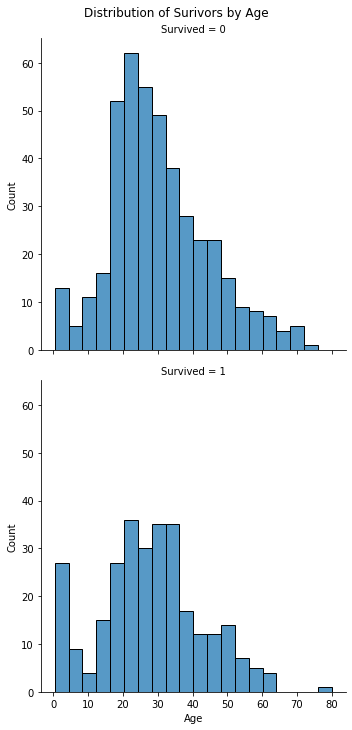

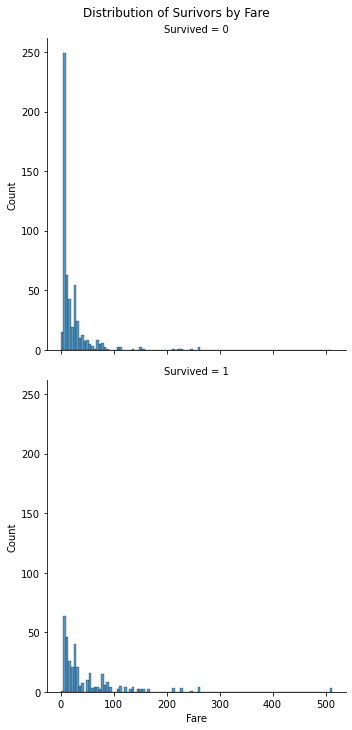

In [4]:
# continuous data EDA (Age, Fare) 
# plot the distribution of people that survived based on their ages
age_plot = sns.displot(data=df, x='Age', kind='hist', row='Survived', palette='bright')
age_plot.fig.suptitle('Distribution of Surivors by Age', y=1.01)

fare_plot = sns.displot(data=df, x='Fare', kind='hist', row='Survived', palette='bright')
fare_plot.fig.suptitle('Distribution of Surivors by Fare', y=1.01)


#### Brief discussion of what EDA has revealed about the data

<p>
<span style="color:blue">
    <b>IGNORE!</b>
    <br>
    Most influential in determining survival: gender, socio-economic class (Pclass), fare:
    <br><br>
    1. Gender: women 
    <br>
    2. Pclass: upper class (=1, middle=2, lower=3; negative correlation)
    <br>
    3. Fare: those who bought more expensive tickets (related to Pclass; rooms on higher decks)
    <br>
    About 70% of the survivors were female
    <br>
    A vast majority of the people who did not survive were in the lower class, and between the ages of 20 to 30
</span>
</p>

# Acutal Data Analysis

## Preprocessing

Converting categorical data to dummies (aka making them into individual columns)

In [36]:
# convert categorical data to dummies, including Pclass (since its actually categorical, represented by numbers)
df_origin = df
df_origin['Pclass'] = pd.Categorical(df_origin.Pclass)
df_origin = pd.get_dummies(df_origin)
df_origin

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,NaN,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


Fill in missing age data with the average age

In [40]:
# note: missing age data --> fill in with average ages
# df_origin.isna().sum()

df_origin['Age'] = df_origin['Age'].fillna(np.mean(df_origin['Age']))
df_origin

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


## Build Logistic Regression Models

### Split data into train & test

In [10]:
from sklearn.model_selection import train_test_split

y = df_origin.Survived
X = df_origin.drop(columns='Survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

### Build models: LinearSVC, SVC, LogisticRegression
(Based on Training Data)

#### Build LinearSVC Model

In [11]:
# perform logistic regression using LinearSVC
from sklearn.svm import LinearSVC  

lsvm = LinearSVC(random_state=88)
lsvm.fit(X_train, y_train)
lsvm.score(X_train, y_train)

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6306179775280899

#### Build SVC Model

In [12]:
# perform logistic regression using SVC
from sklearn.svm import SVC
svm = SVC() # default hyperparameters
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

# regularization --> c for 
# use cross validation -- to eliminate outliers + train each models with different values of c
# cross validation tool in scikit learn + 

0.6502808988764045

#### Build Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
lr.score(X_train, y_train) # accuracy 

0.8033707865168539

### Test model: LogisticRegression
(Model built using Training Data, using this model since it has the highest confidence interval)

#### Plotting ROC Curve

In [14]:
from sklearn.metrics import roc_curve

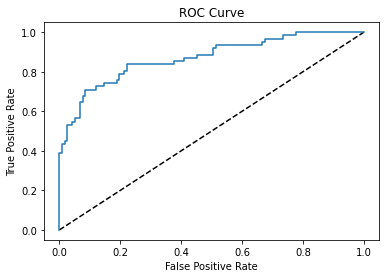

In [15]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Area under the ROC curve (AUC)


In [16]:
# AUC in scikit-learn

# Pass true labels and predicted probabilities to roc_auc_score()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.870140612076096

In [17]:
# AUC using cross-validation

from sklearn.model_selection import cross_val_score
# Pass estimator, features, target, cross-val folds, scoring='roc_auc'
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='roc_auc')
# Print AUC list
print(cv_scores)



[0.84677207 0.82941176 0.85240642 0.83957219 0.87448478]


<p>
<span style="color:blue">
TRY DIFFERNT FOLDS
</span>
</p>

## Investigating important features

In [19]:
# predicted survivals of test set 
y_pred = lr.predict(X_test)

# put X_train + y_train together --> true train set
# put X_test and y_pred together --> predicted test set 
X_train['Survived'] = y_train
true_train = X_train
X_test['Survived'] = y_pred
pred_test = X_test

In [25]:
# calculate correlation between Survival & other features: true train set 
true_train_corr = true_train.corr().sort_values('Survived', ascending=False)['Survived']
true_train_corr

Survived       1.000000
Sex_female     0.541214
Pclass_1       0.287216
Fare           0.251220
Embarked_C     0.195309
Pclass_2       0.118106
Parch          0.066138
Embarked_Q     0.018750
SibSp         -0.023224
PassengerId   -0.030058
Age           -0.064605
Embarked_S    -0.185201
Pclass_3      -0.341264
Name: Survived, dtype: float64

In [24]:
# calculate correlation between Survival & other features: predicted test set 
pred_test_corr = pred_test.corr().sort_values('Survived', ascending=False)['Survived']
pred_test_corr

Survived       1.000000
Sex_female     0.786186
Fare           0.367898
Pclass_1       0.345542
Embarked_C     0.233449
Parch          0.099132
SibSp          0.057536
PassengerId    0.030446
Embarked_Q    -0.108617
Pclass_2      -0.124854
Embarked_S    -0.155956
Pclass_3      -0.206107
Age           -0.242637
Name: Survived, dtype: float64